In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
def true_fun(experience, uni, n_sample):
    return 20_000 + 1000*experience + 5000*uni + 1000*experience*uni + np.random.randn(n_sample) * 10000

In [79]:
n_sample = 50
np.random.seed(0)

uni = np.random.randint(2, size=n_sample)
experience = np.random.randint(30, size=n_sample)

In [80]:
salaries = true_fun(experience, uni, n_sample)

In [81]:
salaries

array([14903.47818248, 22619.25698389, 30472.0463995 , 52774.90355832,
        8861.02152442, 42872.59719786, 56045.33438806, 74869.02497859,
       25891.94862431, 35193.67815878, 60718.17771661, 47283.3187053 ,
       48665.17222383, 32024.7189774 , 13656.77906319, 16372.58834013,
       17275.39552224, 37404.46838459, 16868.53717956, 19737.17397668,
       29774.26142254, 60982.19063792, 42698.01653034, 39627.82255526,
       14927.01635617, 43519.45395796, 52290.90562178, 78289.82910757,
       84394.00684543,  8651.74179646, 31023.41641178, 20151.8990906 ,
       34292.02850818, 39211.50335236, 27884.47467873, 37561.6534223 ,
       31348.50159217, 56008.26486954, 57656.6243973 , 22637.56313723,
       61882.52193796, 43958.89176031, 45787.7957116 , 29200.75164188,
       56292.47378489, 59544.51726931, 70968.23053027, 57224.45070382,
       42082.74978077, 56766.39036484])

In [82]:
experience

array([ 0,  1,  9, 25,  0, 10, 20, 23,  3, 11, 18, 23, 28,  2,  0,  0,  4,
       21,  5,  6,  8, 20, 17, 15,  4,  9, 10, 26, 24,  1,  1,  7,  9, 25,
        3,  6, 23, 11, 14, 18, 27,  0, 14,  3, 21, 12, 25, 10, 20, 11])

In [83]:
df = pd.DataFrame([salaries, experience, uni], index=['salaries', 'experience', 'uni']).transpose()

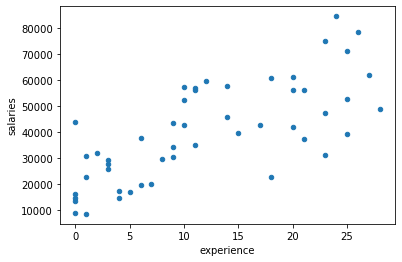

In [84]:
df.sort_values('experience').plot(x='experience', y='salaries', kind='scatter')

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [97]:
m = LinearRegression()
poly = PolynomialFeatures(interaction_only=True)
poly_features = poly.fit_transform(df[['experience', 'uni']])
m.fit(poly_features, df['salaries'])
ypred_exp = m.predict(poly_features)

In [96]:
df.sort_values('experience', inplace=True)

In [100]:
def plot_results(ypred, y_true, x):
    plt.figure(figsize=(12, 8))
    plt.scatter(x, y_true, color='b')
    plt.scatter(x, ypred, color='r')
    plt.show()

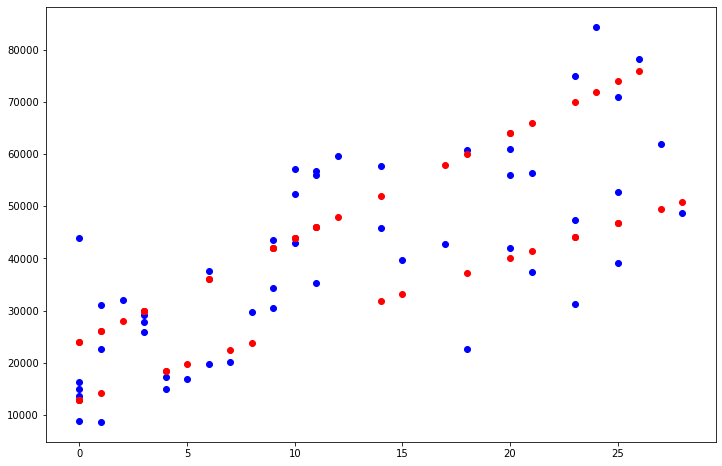

In [101]:
plot_results(ypred_exp, df['salaries'], df[['experience']])